In [1]:
import osm_loader

bbox=[41.3752, 2.0354, 41.3889, 2.0586]

In [2]:
network = osm_loader.load_network_from_bbox(bbox, 'sant_feliu')

In [6]:
pois = osm_loader.load_pois_from_bbox(bbox, 'sant_feliu')

In [13]:
# AUTOMATIZE THIS?
from pandas import Series

max_dist = 1000
max_pois=5

network.init_pois(num_categories=len(pois), max_dist=max_dist, max_pois=max_pois)
nearest = Series()
for poi_key, poi_value in pois.iteritems():
    network.set_pois(poi_key, poi_value.lon, poi_value.lat)
    nearest.set_value(poi_key, network.nearest_pois(max_dist, poi_key, num_pois=max_pois))

Can't initialize twice


In [75]:
from pandas import DataFrame

df = DataFrame()
for key, values in nearest.iteritems():
    df[key] = values[1]

In [107]:
df.corr()

          amenity      shop
amenity  1.000000  0.410113
shop     0.410113  1.000000

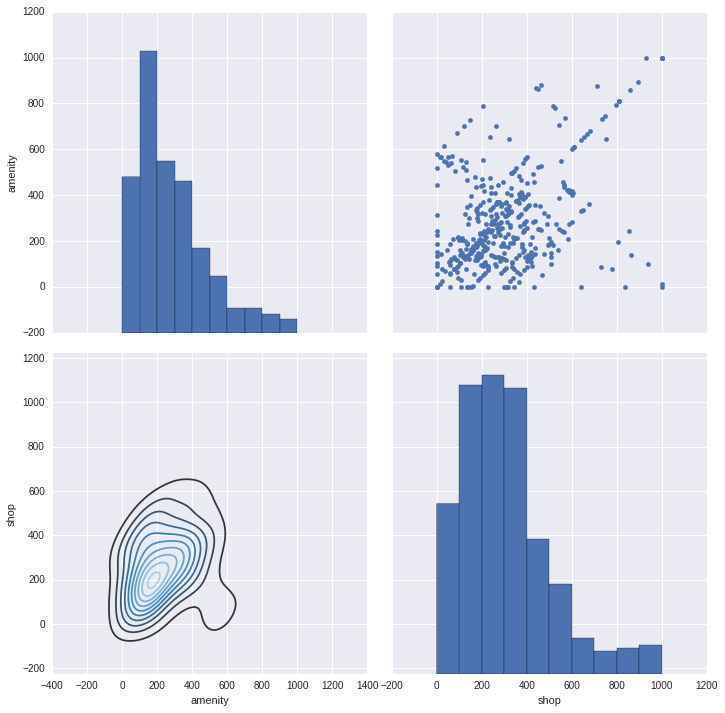

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
g = sns.PairGrid(df, diag_sharey=False, size=5)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
# g.map_diag(sns.kdeplot, lw=3)
g.map_diag(plt.hist)